In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [99]:
data = pd.read_csv("diabetic_data.csv")
print(f"Data shape: {data.shape} (rows, columns)")

Data shape: (101766, 50) (rows, columns)


In [100]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [101]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [103]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

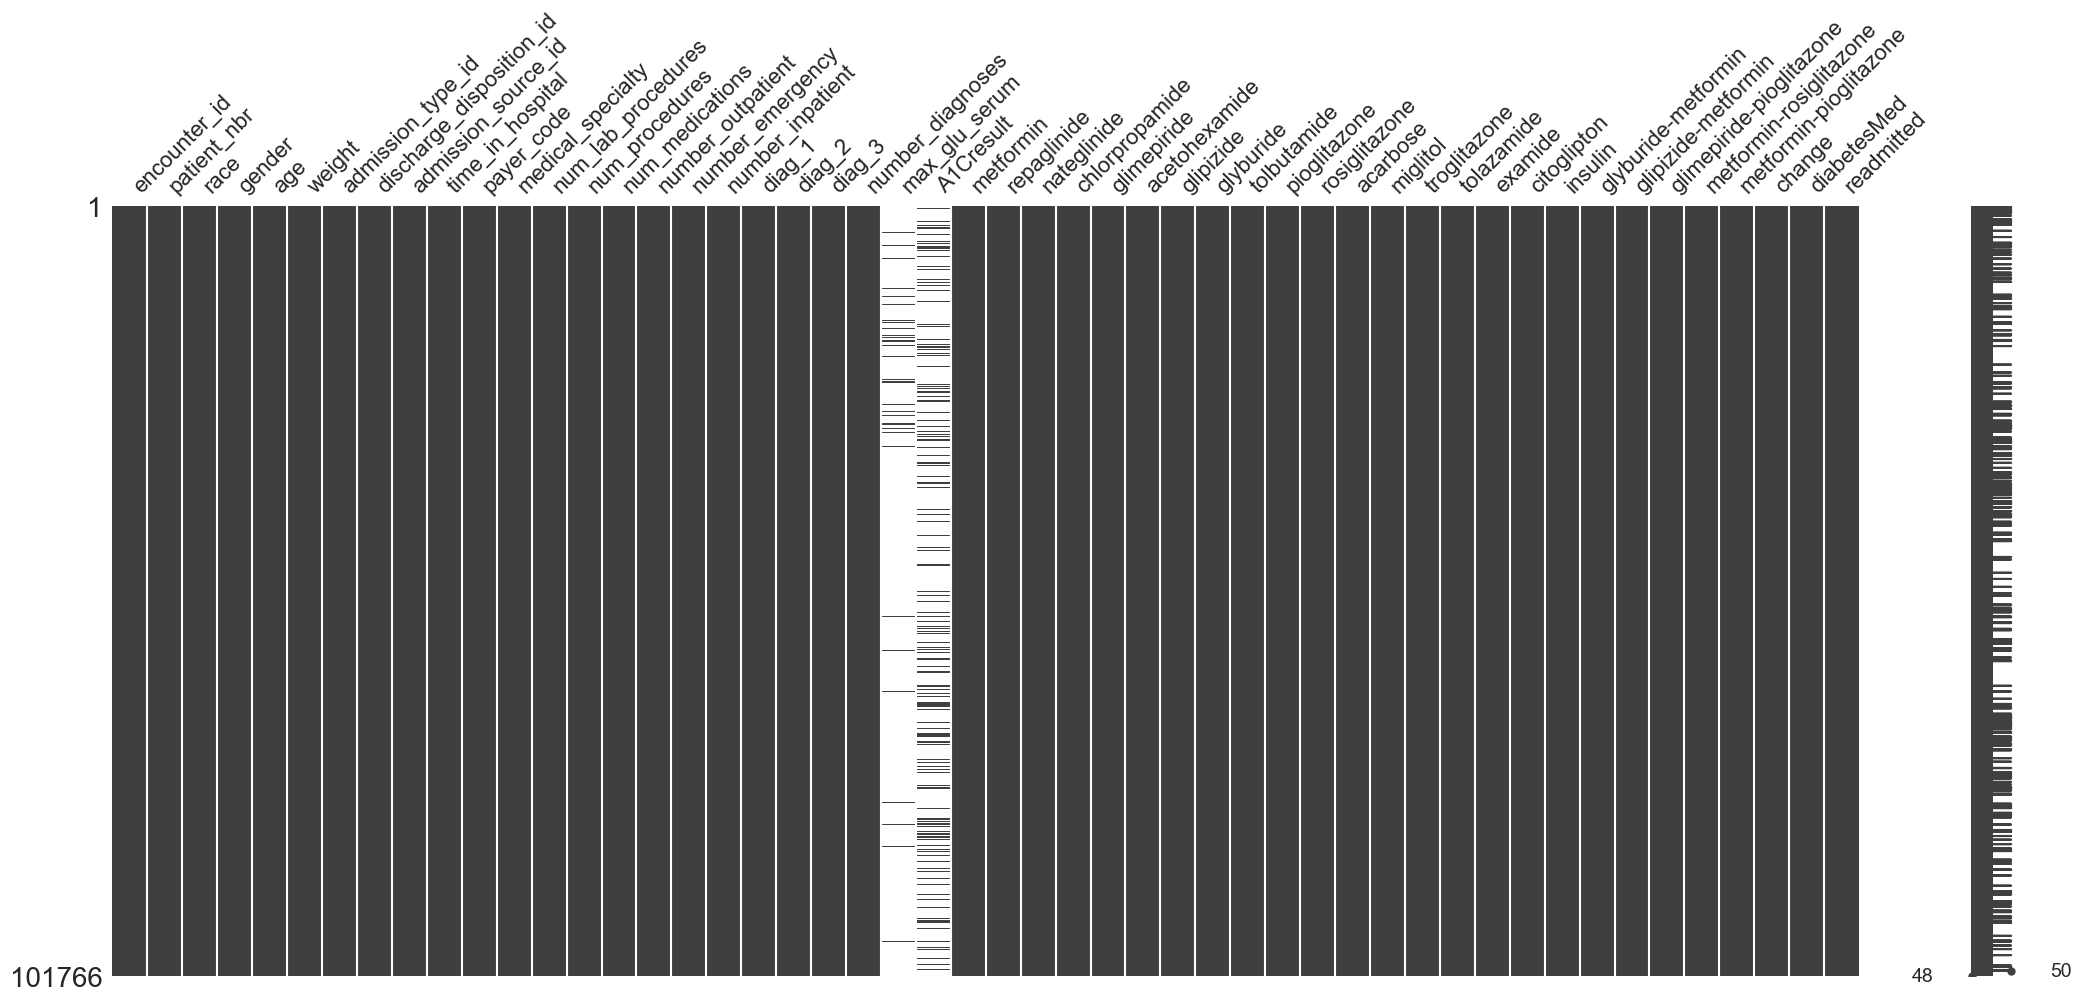

In [104]:
msno.matrix(data)
plt.show()


In [105]:
data.duplicated().sum()

np.int64(0)

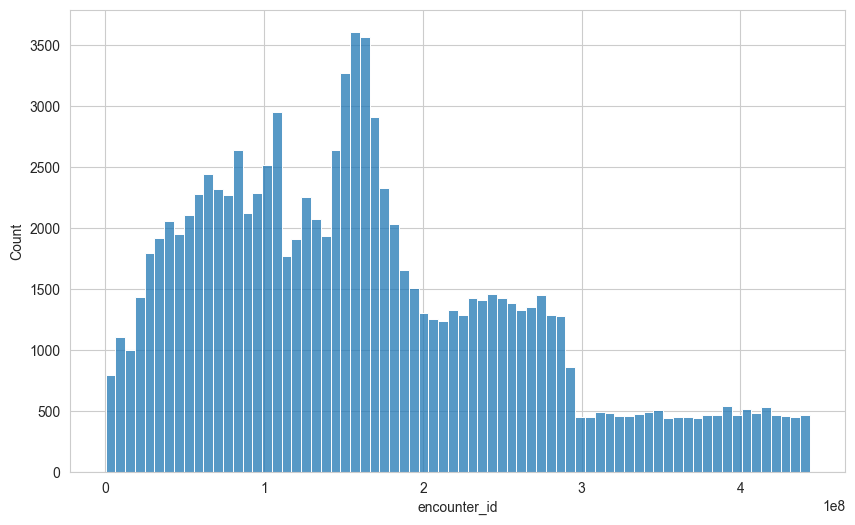

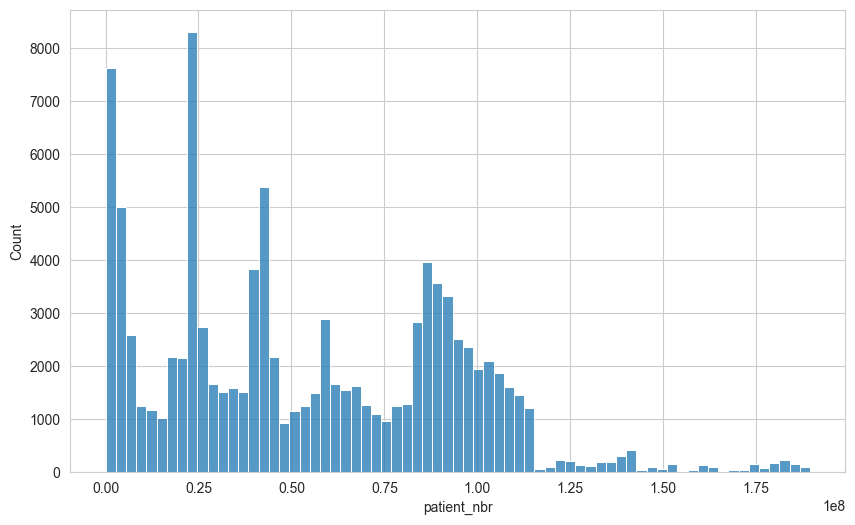

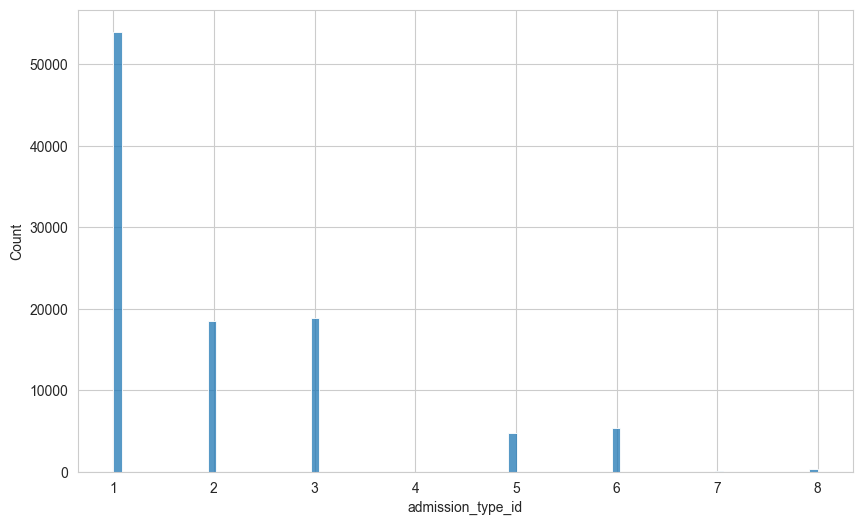

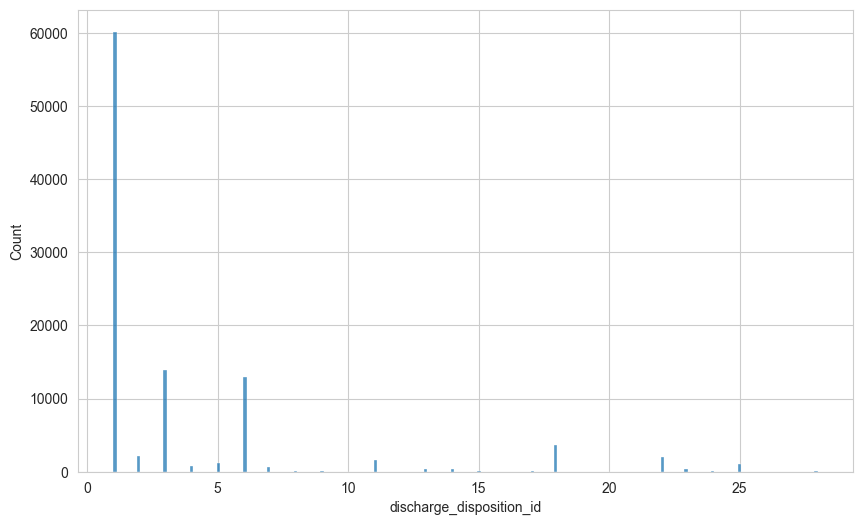

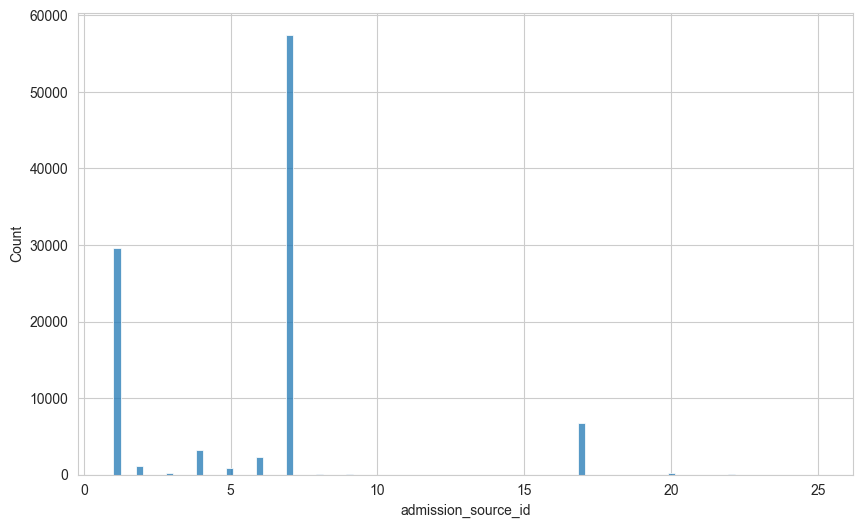

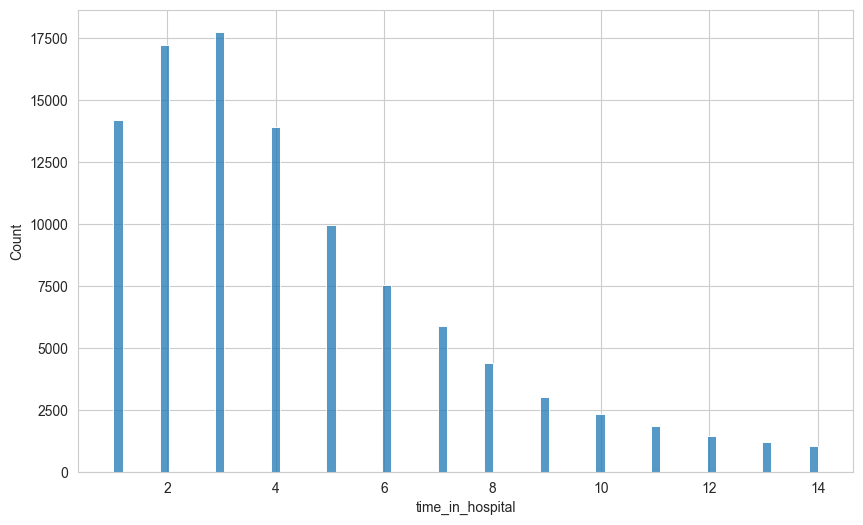

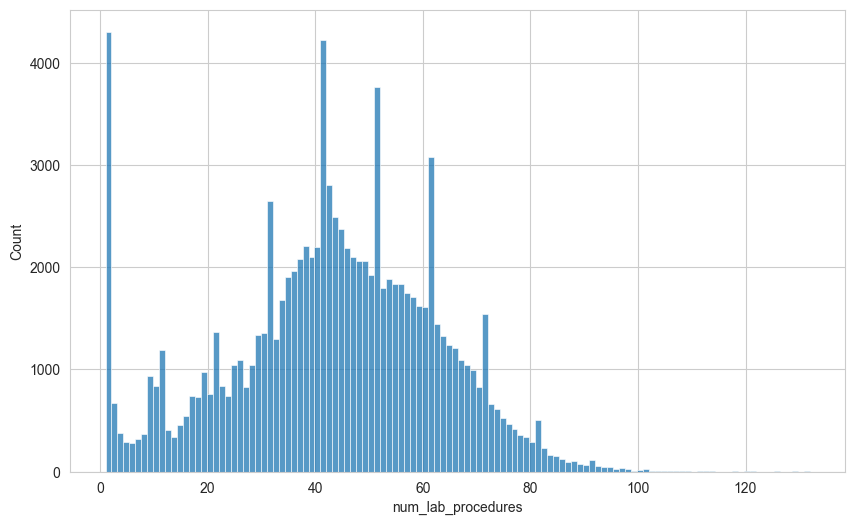

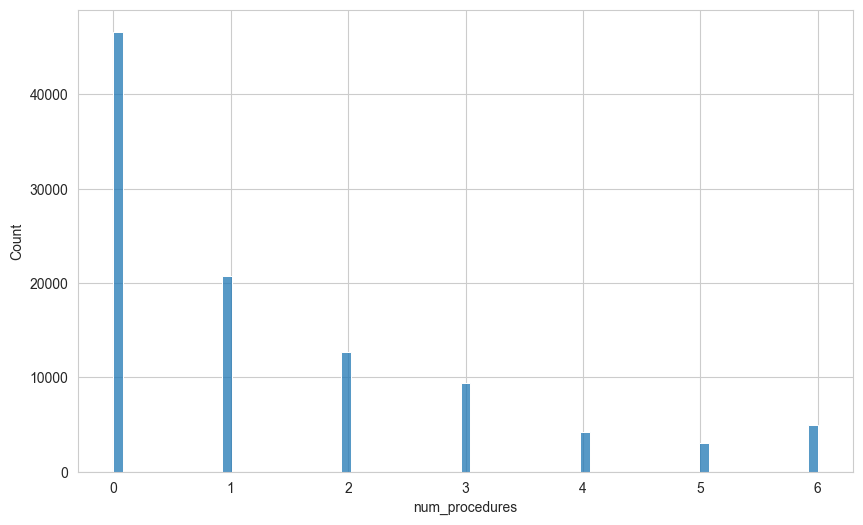

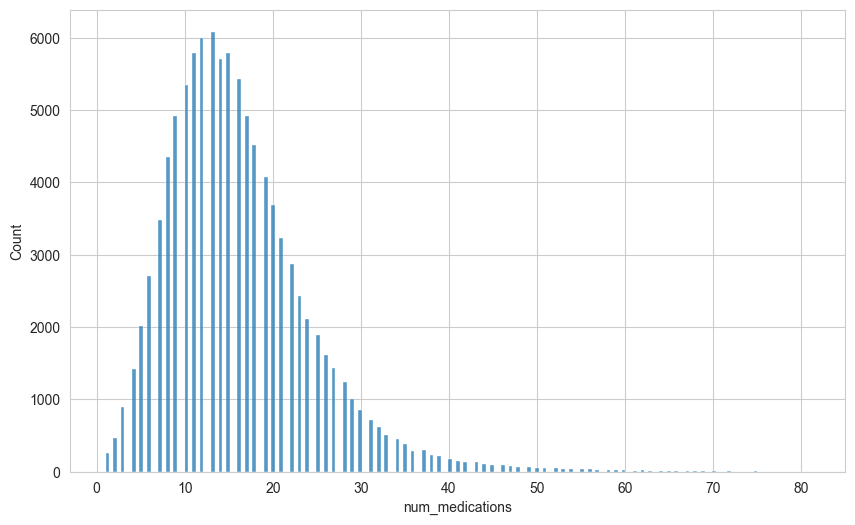

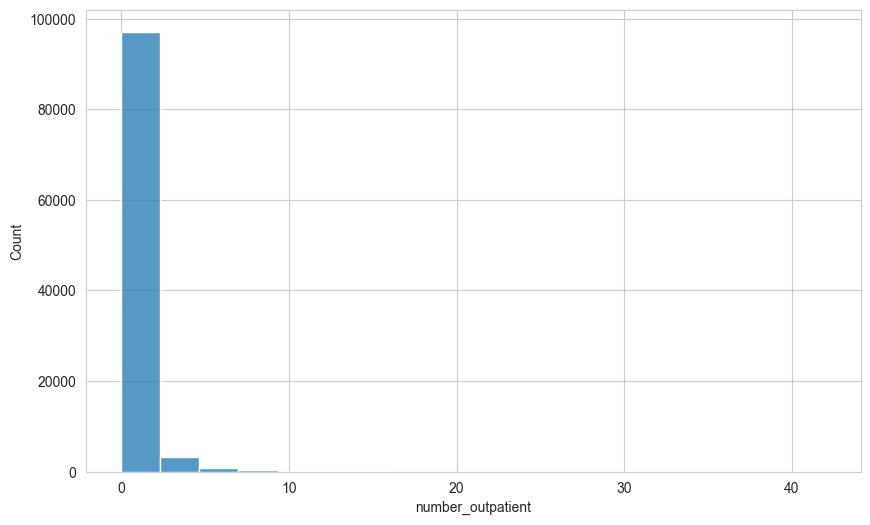

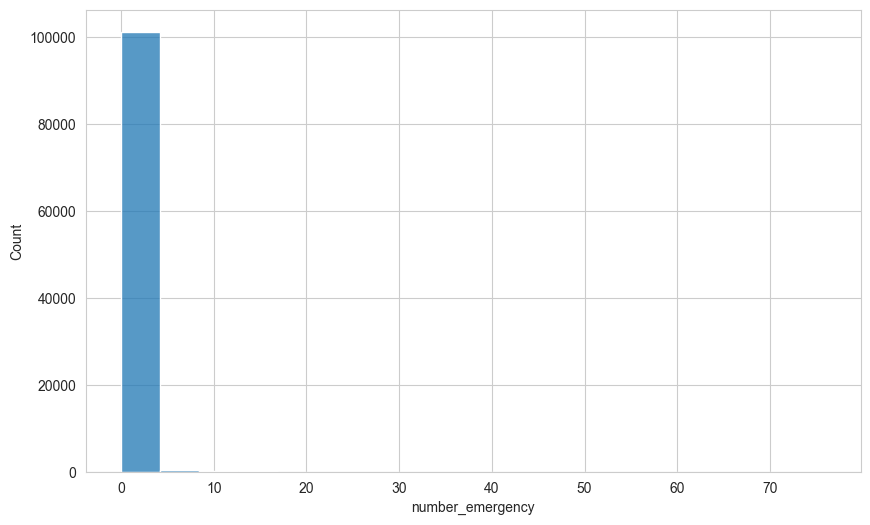

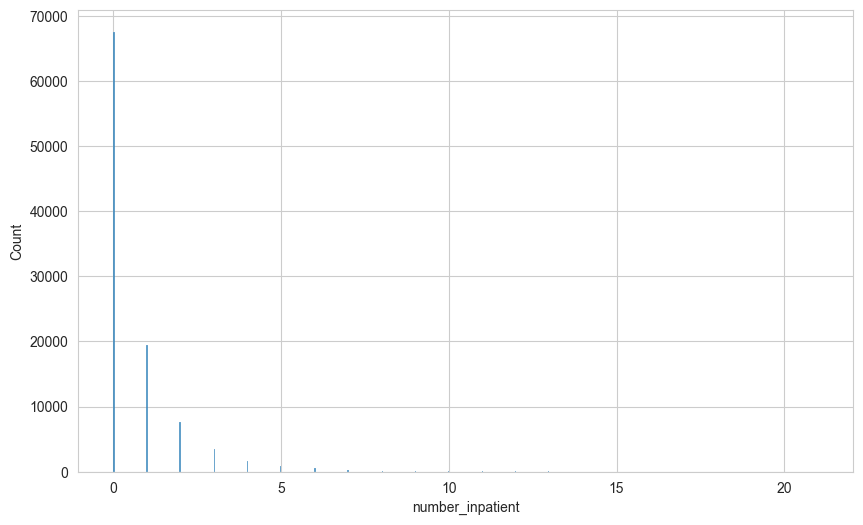

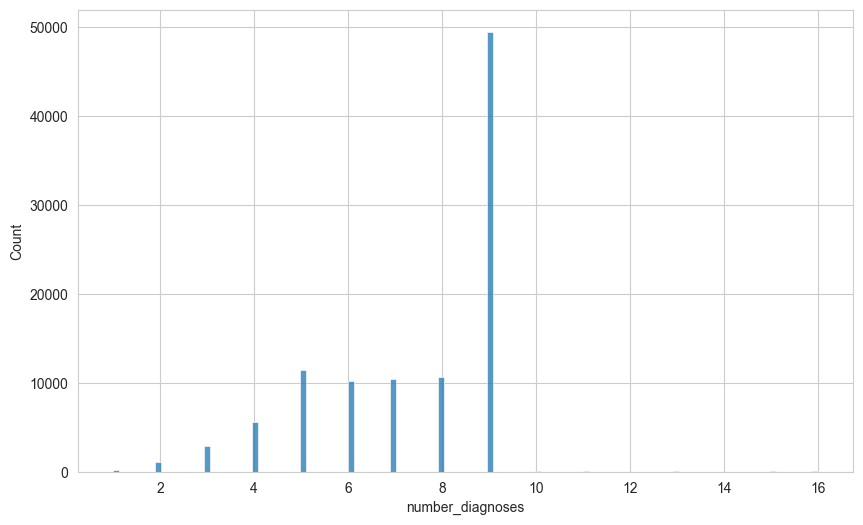

In [106]:
for i in data.select_dtypes(include='number').columns:
  sns.histplot(data = data, x = i)
  plt.show()

In [107]:
for i in data.select_dtypes(include='object').columns:
  print(data[i].value_counts())
  print('---' * 10)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
------------------------------
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
------------------------------
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
------------------------------
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
------------------------------
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549

Age and Gender Count

<Axes: xlabel='gender'>

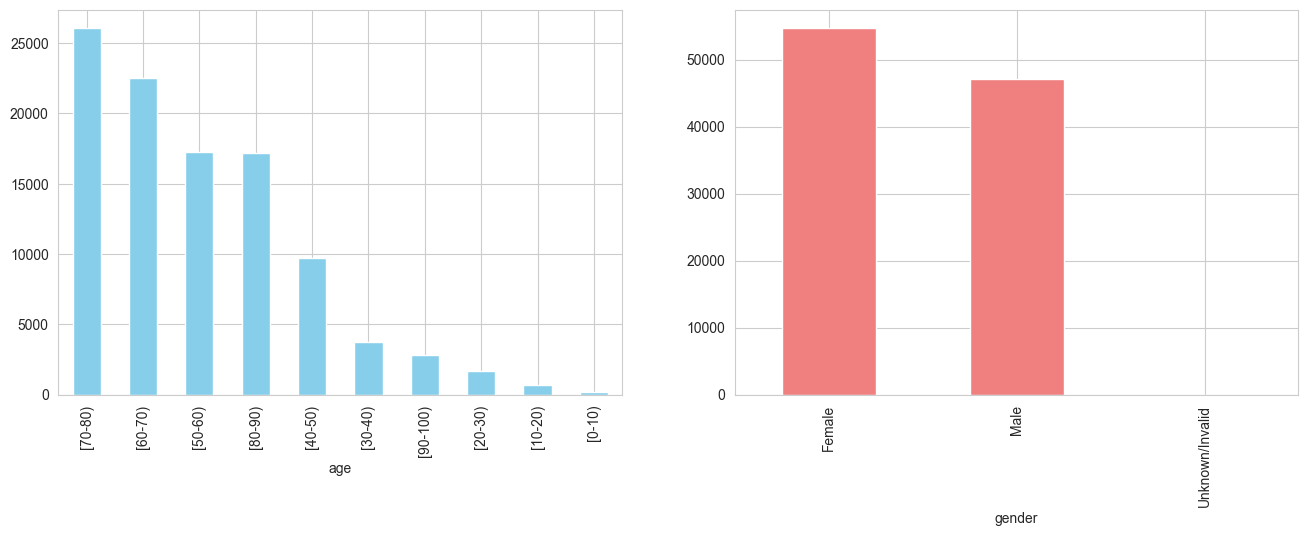

In [108]:
age_count = data["age"].value_counts()
gender_count = data["gender"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
age_count.plot(kind='bar', ax=ax1, color='skyblue')
gender_count.plot(kind='bar', ax=ax2, color='lightcoral')

Race and Weight Count

<Axes: xlabel='weight'>

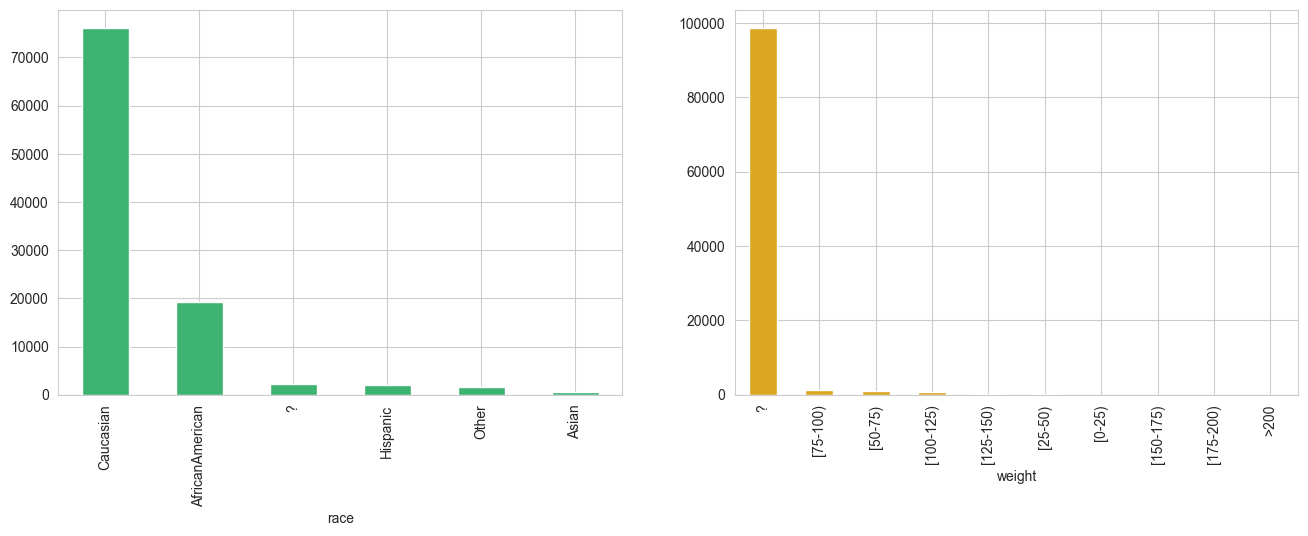

In [109]:
race_count = data["race"].value_counts()
weight_count = data["weight"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
race_count.plot(kind='bar', ax=ax1, color='mediumseagreen')
weight_count.plot(kind='bar', ax=ax2, color='goldenrod')

Readmission Rate Count

<Axes: title={'center': 'Readmission Count'}, xlabel='readmitted'>

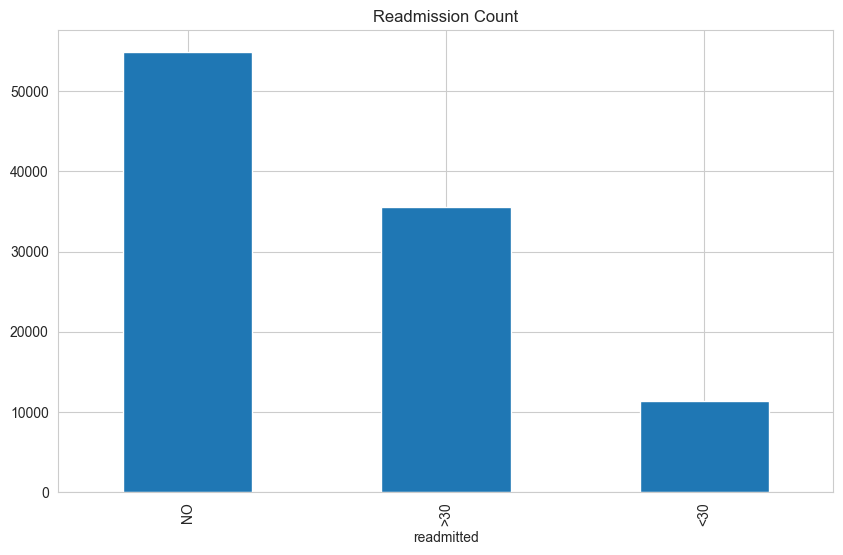

In [110]:
target_count = data['readmitted'].value_counts()
target_count.plot(kind = 'bar', title= 'Readmission Count')

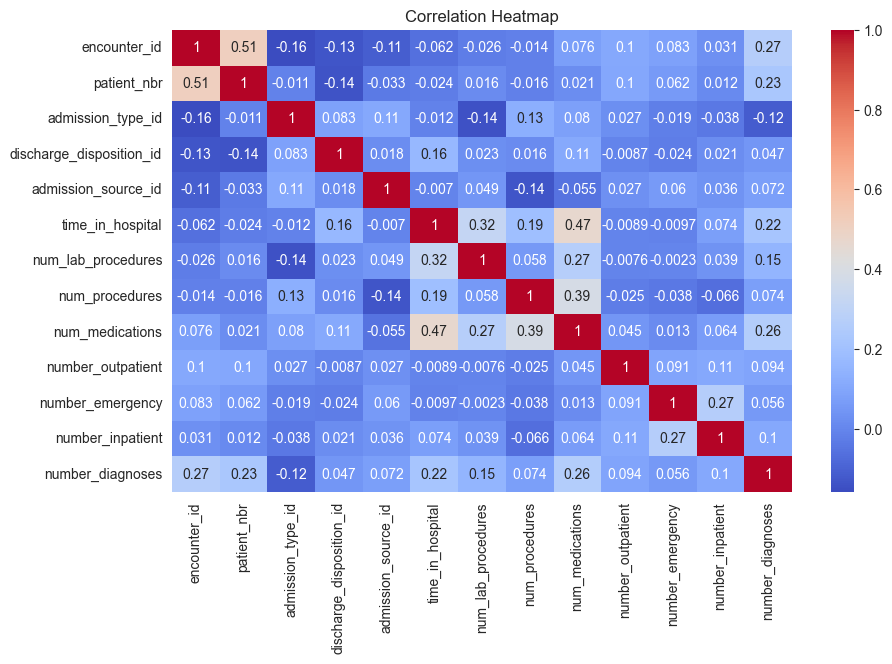

In [111]:
corr = data.select_dtypes(include = 'number').corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [112]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Diagnosis vs Readmission

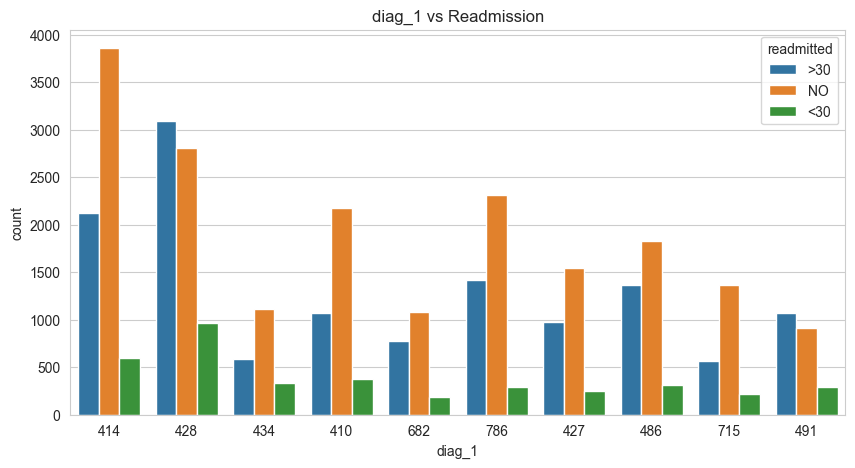

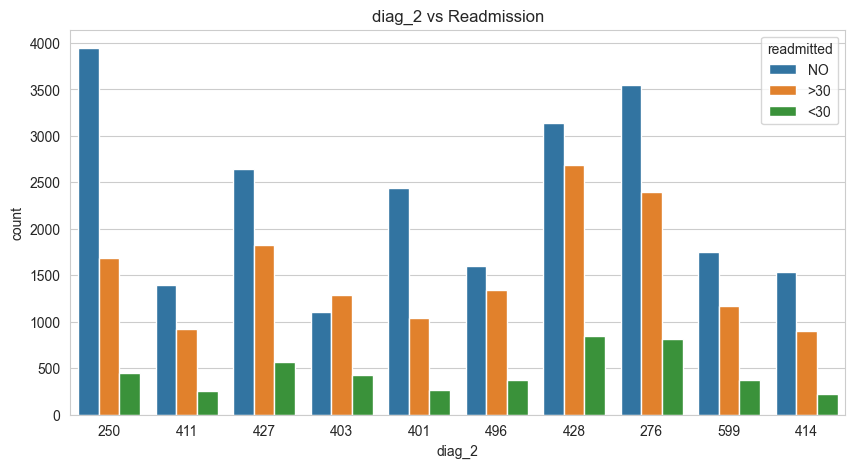

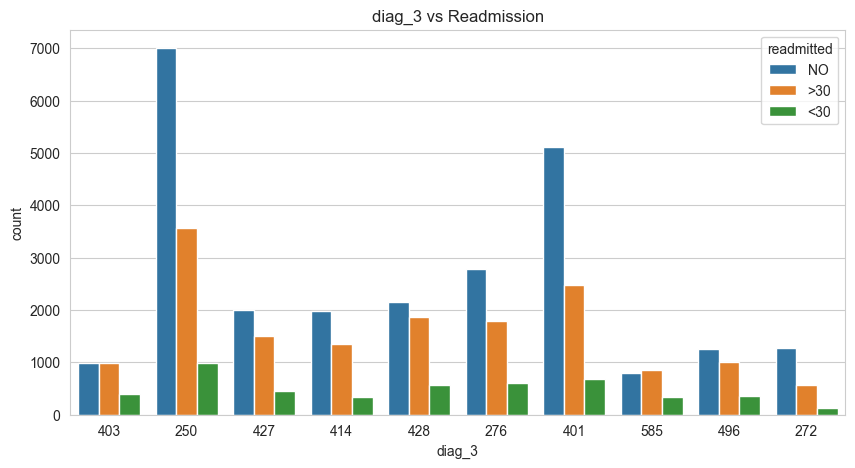

In [113]:
diagnosis_cols = ['diag_1', 'diag_2', 'diag_3']

# Diagnosis vs Readmission
for diag in diagnosis_cols:
    plt.figure(figsize=(10, 5))
    top10 = data[diag].value_counts().iloc[:10].index  # Top 10 frequent diagnoses
    sns.countplot(data=data[data[diag].isin(top10)], x=diag, hue='readmitted')
    plt.title(f'{diag} vs Readmission')
    plt.xticks(rotation=0)
    plt.show()

# **Data Processing**

In [114]:
missing_info = []

# Check missing values for object columns
for col in data.select_dtypes(include = 'object').columns:
        count_missing = data[col][data[col] == '?'].count()
        percent_missing = (count_missing / data.shape[0] * 100).round(2)
        missing_info.append([col, count_missing, percent_missing])

# Create DataFrame from collected missing info
missing_value = pd.DataFrame(missing_info, columns=["col", "count_missing", "percent_missing"])
missing_value = missing_value.sort_values(by="percent_missing", ascending=False)

missing_value

,col,count_missing,percent_missing
3,weight,98569,96.86
5,medical_specialty,49949,49.08
4,payer_code,40256,39.56
0,race,2273,2.23
8,diag_3,1423,1.40
7,diag_2,358,0.35
6,diag_1,21,0.02
1,gender,0,0.00
2,age,0,0.00
9,max_glu_serum,0,0.00


In [115]:
data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

data = data.drop(data[
    ((data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')) |
    (data['admission_type_id'].isin([5, 6, 8])) |
    (data['discharge_disposition_id'].isin([11, 13, 14, 18, 19, 20, 21, 25, 26])) |
    (data['admission_source_id'].isin([9, 15, 17, 20, 21]))
].index)

In [116]:
data.shape

(84377, 47)

In [117]:

data = data.drop(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
data = data.drop(set(data['race'][data['race']=='?'].index))

In [118]:
data.shape

(82367, 47)

In [119]:
data['readmitted'].value_counts()

readmitted
NO     43322
>30    29592
<30     9453
Name: count, dtype: int64

In [120]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               82054
A1Cresult                   68144
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [121]:
data.drop('max_glu_serum', axis=1, inplace=True)
data['A1Cresult'] = data['A1Cresult'].fillna('None')

In [122]:
data.shape

(82367, 46)

In [123]:
data = data.drop(["encounter_id","patient_nbr"],axis=1)
data = data.drop(["citoglipton","examide"],axis = 1)

In [124]:
data.shape

(82367, 42)

 Decode ID Columns Using Mapping:

In [125]:
admission_type_map = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    7: 'Trauma Center',
}
discharge_disposition_map = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    12: 'Still patient or expected to return for outpatient services',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    22: 'Discharged/transferred to another rehab facility including rehab units of a hospital',
    23: 'Discharged/transferred to a long term care hospital',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
}
admission_source_map = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
}
data['admission_type_id'] = data['admission_type_id'].replace(admission_type_map)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(discharge_disposition_map)
data['admission_source_id'] = data['admission_source_id'].replace(admission_source_map)

## **EDA**

In [126]:
data['total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data['missing_diag'] = ((data['diag_1'] == '?') | (data['diag_2'] == '?') | (data['diag_3'] == '?')).astype(int)

meds_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone',
    'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide'
]

for col in meds_cols:
    new_col = f"{col}_new"
    data[new_col] = data[col].apply(lambda x: 0 if x in ['No', 'Steady'] else 1)

data['med_change'] = data[[f"{col}_new" for col in meds_cols]].sum(axis=1)

data.drop(columns=[f"{col}_new" for col in meds_cols], inplace=True)

In [127]:
data.shape

(82367, 45)

In [128]:
data['med_change'].value_counts()

med_change
0    59636
1    21531
2     1098
3       97
4        5
Name: count, dtype: int64

In [129]:

for col in meds_cols:
    data[col] = data[col].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

data['num_med'] = data[meds_cols].sum(axis=1)

C:\Users\ashar\AppData\Local\Temp\ipykernel_38460\1261907826.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})


In [130]:
data['num_med'].value_counts()

num_med
1    38061
0    18295
2    18152
3     6627
4     1175
5       55
6        2
Name: count, dtype: int64

In [131]:
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [132]:
data['age_num'] = data['age'].str.extract('(\d+)', expand=False).astype(int) + 5

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ashar\AppData\Local\Temp\ipykernel_38460\3082056381.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['age_num'] = data['age'].str.extract('(\d+)', expand=False).astype(int) + 5


In [133]:
data['age_num'].value_counts()

age_num
75    20557
65    18467
55    14259
85    13655
45     7907
35     3163
95     2158
25     1429
15      627
5       145
Name: count, dtype: int64

In [134]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_visits', 'missing_diag', 'med_change', 'num_med', 'age_num'],
      dtype='object')

In [135]:
data.shape

(82367, 47)

In [136]:
data['high_A1C_flag'] = data['A1Cresult'].isin(['>7', '>8']).astype(int)

In [137]:
data.shape

(82367, 48)

In [138]:
label_cols = ['race', 'A1Cresult']

le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [139]:
data['diag_1'].value_counts()

diag_1
428    5542
414    5392
786    3185
410    2773
486    2763
       ... 
976       1
363       1
842       1
V25       1
V51       1
Name: count, Length: 705, dtype: int64

In [140]:
# Safe numeric conversion first
data['diag_1_num'] = pd.to_numeric(data['diag_1'], errors='coerce')
data['diag_2_num'] = pd.to_numeric(data['diag_2'], errors='coerce')
data['diag_3_num'] = pd.to_numeric(data['diag_3'], errors='coerce')

# Initialize new columns
data['diag_1_code'] = 0
data['diag_2_code'] = 0
data['diag_3_code'] = 0

# Mapping for diag_1
data.loc[data['diag_1'].astype(str).str.startswith('V'), 'diag_1_code'] = 1
data.loc[data['diag_1'].astype(str).str.startswith('E'), 'diag_1_code'] = 2
data.loc[((data['diag_1_num'] >= 390) & (data['diag_1_num'] < 460)) | (data['diag_1_num'] == 785), 'diag_1_code'] = 3
data.loc[((data['diag_1_num'] >= 460) & (data['diag_1_num'] < 520)) | (data['diag_1_num'] == 786), 'diag_1_code'] = 4
data.loc[((data['diag_1_num'] >= 520) & (data['diag_1_num'] < 580)) | (data['diag_1_num'] == 787), 'diag_1_code'] = 5
data.loc[(data['diag_1_num'] >= 250) & (data['diag_1_num'] < 251), 'diag_1_code'] = 6
data.loc[(data['diag_1_num'] >= 800) & (data['diag_1_num'] < 1000), 'diag_1_code'] = 7
data.loc[(data['diag_1_num'] >= 710) & (data['diag_1_num'] < 740), 'diag_1_code'] = 8
data.loc[((data['diag_1_num'] >= 580) & (data['diag_1_num'] < 630)) | (data['diag_1_num'] == 788), 'diag_1_code'] = 9
data.loc[(data['diag_1_num'] >= 140) & (data['diag_1_num'] < 240), 'diag_1_code'] = 10

# Mapping for diag_2
data.loc[data['diag_2'].astype(str).str.startswith('V'), 'diag_2_code'] = 1
data.loc[data['diag_2'].astype(str).str.startswith('E'), 'diag_2_code'] = 2
data.loc[((data['diag_2_num'] >= 390) & (data['diag_2_num'] < 460)) | (data['diag_2_num'] == 785), 'diag_2_code'] = 3
data.loc[((data['diag_2_num'] >= 460) & (data['diag_2_num'] < 520)) | (data['diag_2_num'] == 786), 'diag_2_code'] = 4
data.loc[((data['diag_2_num'] >= 520) & (data['diag_2_num'] < 580)) | (data['diag_2_num'] == 787), 'diag_2_code'] = 5
data.loc[(data['diag_2_num'] >= 250) & (data['diag_2_num'] < 251), 'diag_2_code'] = 6
data.loc[(data['diag_2_num'] >= 800) & (data['diag_2_num'] < 1000), 'diag_2_code'] = 7
data.loc[(data['diag_2_num'] >= 710) & (data['diag_2_num'] < 740), 'diag_2_code'] = 8
data.loc[((data['diag_2_num'] >= 580) & (data['diag_2_num'] < 630)) | (data['diag_2_num'] == 788), 'diag_2_code'] = 9
data.loc[(data['diag_2_num'] >= 140) & (data['diag_2_num'] < 240), 'diag_2_code'] = 10

# Mapping for diag_3
data.loc[data['diag_3'].astype(str).str.startswith('V'), 'diag_3_code'] = 1
data.loc[data['diag_3'].astype(str).str.startswith('E'), 'diag_3_code'] = 2
data.loc[((data['diag_3_num'] >= 390) & (data['diag_3_num'] < 460)) | (data['diag_3_num'] == 785), 'diag_3_code'] = 3
data.loc[((data['diag_3_num'] >= 460) & (data['diag_3_num'] < 520)) | (data['diag_3_num'] == 786), 'diag_3_code'] = 4
data.loc[((data['diag_3_num'] >= 520) & (data['diag_3_num'] < 580)) | (data['diag_3_num'] == 787), 'diag_3_code'] = 5
data.loc[(data['diag_3_num'] >= 250) & (data['diag_3_num'] < 251), 'diag_3_code'] = 6
data.loc[(data['diag_3_num'] >= 800) & (data['diag_3_num'] < 1000), 'diag_3_code'] = 7
data.loc[(data['diag_3_num'] >= 710) & (data['diag_3_num'] < 740), 'diag_3_code'] = 8
data.loc[((data['diag_3_num'] >= 580) & (data['diag_3_num'] < 630)) | (data['diag_3_num'] == 788), 'diag_3_code'] = 9
data.loc[(data['diag_3_num'] >= 140) & (data['diag_3_num'] < 240), 'diag_3_code'] = 10

# Optional: Drop intermediate numeric columns if you want
data.drop(['diag_1_num', 'diag_2_num', 'diag_3_num'], axis=1, inplace=True)

In [141]:
data['diag_1_code'].value_counts()

diag_1_code
3     24550
0     13485
4     11403
5      7729
6      7307
7      5777
9      4263
8      3965
10     2613
1      1274
2         1
Name: count, dtype: int64

In [142]:
data.shape

(82367, 51)

In [143]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_visits', 'missing_diag', 'med_change', 'num_med', 'age_num',
       'high_A1C_flag', 'diag_1_code', 'diag_2_code', 'diag_3_code'],
      dtype='object')

In [145]:
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
num_col

['glyburide-metformin',
 'num_medications',
 'acetohexamide',
 'troglitazone',
 'glipizide-metformin',
 'nateglinide',
 'miglitol',
 'chlorpropamide',
 'time_in_hospital',
 'number_diagnoses',
 'acarbose',
 'number_emergency',
 'rosiglitazone',
 'glipizide',
 'diag_3_code',
 'number_inpatient',
 'med_change',
 'num_procedures',
 'diag_1_code',
 'glyburide',
 'glimepiride-pioglitazone',
 'num_lab_procedures',
 'diag_2_code',
 'tolazamide',
 'metformin-rosiglitazone',
 'age_num',
 'tolbutamide',
 'metformin',
 'number_outpatient',
 'insulin',
 'high_A1C_flag',
 'race',
 'num_med',
 'total_visits',
 'missing_diag',
 'glimepiride',
 'A1Cresult',
 'metformin-pioglitazone',
 'repaglinide',
 'pioglitazone']

In [146]:
def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
data[num_col] = standardize(data[num_col])

In [147]:
# Handle outliers for all numerical columns

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

In [148]:
data.shape

(82367, 51)

In [149]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_visits', 'missing_diag', 'med_change', 'num_med', 'age_num',
       'high_A1C_flag', 'diag_1_code', 'diag_2_code', 'diag_3_code'],
      dtype='object')

In [150]:
# Columns that are categorical (object type) and need encoding
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [151]:
data['readmitted'].value_counts()

readmitted
0    72914
1     9453
Name: count, dtype: int64

In [152]:
data.isnull().sum() # high_A1C_flag, metformin-rosiglitazone

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [153]:
data = data.drop(['metformin-rosiglitazone', 'high_A1C_flag'], axis = 1)

In [154]:
data.shape

(82367, 49)